In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

import healpy as hp
import astropy.io.fits as fits

import pixell
import pixell.enmap

import tqdm

import grftools.plotting


# MILCA

In [9]:
with fits.open("../data/y_maps/Planck/milca_ymaps.fits") as hdu:
    y_half_difference = (hdu[1].data["FIRST"]-hdu[1].data["LAST"])/2
    y_full = hdu[1].data["FULL"]

with fits.open("../data/y_maps/Planck/masks.fits") as hdu:
    y_mask_ps = hdu[1].data["M5"].astype(dtype=bool)
    # M1: 40%, M4: 70%
    y_mask_gal = hdu[1].data["M1"].astype(dtype=bool)

with fits.open("../data/y_maps/Planck/milca_stddev.fits") as hdu:
    y_stddev = hdu[1].data["M1"]


Save half difference map

In [26]:
hp.write_map("../data/y_maps/polspice/milca_half_difference/triplet.fits", [y_half_difference, 
                                                                            np.random.randn(y_half_difference.size), 
                                                                            np.random.randn(y_half_difference.size)], overwrite=True)
hp.write_map("data/y_maps/Planck_processed/milca_half_difference.fits", y_half_difference)
hp.write_map("../data/y_maps/Planck_processed/milca_full.fits", y_full)

/home/ttroester/Codes/miniconda/envs/analysis/lib/python3.9/site-packages/healpy/fitsfunc.py:197: FutureWarning: The default dtype of write_map() will change in a future version: explicitly set the dtype if it is important to you
  warnings.warn(


## Create shear footprint
Smooth by 1 deg FWHM, reject pixels < 0.1.

In [12]:
shear_mask = hp.read_map("../data/shear_maps_KiDS1000/z0.9-1.2/doublet_mask.fits")

shear_mask[shear_mask < 1] = 0

shear_mask_fwhm_1deg = hp.sphtfunc.smoothing(shear_mask, fwhm=1.0/180*np.pi, iter=1)
shear_mask_fwhm_1deg[shear_mask_fwhm_1deg>0.1] = 1
shear_mask_fwhm_1deg[shear_mask_fwhm_1deg<=0.1] = 0

shear_mask_fwhm_1deg[shear_mask_fwhm_1deg < 1] = hp.UNSEEN

y_gal_ps_shear_footprint_mask = shear_mask_fwhm_1deg * y_mask_gal * y_mask_ps
y_gal_ps_shear_footprint_mask[y_gal_ps_shear_footprint_mask < 1] = hp.UNSEEN

/home/ttroester/Codes/miniconda/envs/analysis/lib/python3.9/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/home/ttroester/Codes/miniconda/envs/analysis/lib/python3.9/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))
/home/ttroester/Codes/miniconda/envs/analysis/lib/python3.9/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/home/ttroester/Codes/miniconda/envs/analysis/lib/python3.9/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = EXPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))
/home/ttroester/Codes/miniconda/envs/analysis/lib/p

In [ ]:
hp.write_map("../data/shear_maps_KiDS1000/footprint_masks/shear_footprint_1deg_smooth.fits", shear_mask_fwhm_1deg, 
             partial=True, dtype=np.float32, overwrite=True)
hp.write_map("../data/y_maps/Planck_processed/y_gal40_ps_shear_footprint_1deg_smooth.fits", y_gal_ps_shear_footprint_mask, 
             partial=True, dtype=np.float32, overwrite=True)


# NILC

In [27]:
with fits.open("../data/y_maps/Planck/COM_CompMap_Compton-SZMap-nilc-ymaps_2048_R2.00.fits") as hdu:
    y_half_difference = (hdu[1].data["FIRST"]-hdu[1].data["LAST"])/2
    y_full = hdu[1].data["FULL"]

In [29]:
hp.write_map("../data/y_maps/Planck_processed/nilc_half_difference.fits", y_half_difference)
hp.write_map("../data/y_maps/Planck_processed/nilc_full.fits", y_full)

In [30]:
hp.write_map("../data/y_maps/Planck_processed/mask_ps_gal40.fits", y_mask_ps*y_mask_gal)

/home/ttroester/Codes/miniconda/envs/analysis/lib/python3.9/site-packages/healpy/fitsfunc.py:197: FutureWarning: The default dtype of write_map() will change in a future version: explicitly set the dtype if it is important to you
  warnings.warn(


In [13]:
hp.write_map("../data/y_maps/Planck_processed/mask_ps.fits", y_mask_ps, dtype=bool, fits_IDL=False, overwrite=True)

# Smooth CIB map to 10' beam

In [3]:
cib_545 = hp.read_map("../data/CIB_maps/Planck/COM_CompMap_CIB-GNILC-F545_2048_R2.00.fits")

/home/ttroester/Codes/miniconda/envs/analysis/lib/python3.9/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/home/ttroester/Codes/miniconda/envs/analysis/lib/python3.9/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))
/home/ttroester/Codes/miniconda/envs/analysis/lib/python3.9/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/home/ttroester/Codes/miniconda/envs/analysis/lib/python3.9/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


In [4]:
fwhm_map = 5.0
fwhm_target = 10.0
fwhm_sq = fwhm_target**2 - fwhm_map**2
sigma_sq = fwhm_sq * (1/60.0/180.0*np.pi/(2.0*np.sqrt(2.0*np.log(2.0))))**2

cib_545_beam10 = hp.smoothing(cib_545, sigma=np.sqrt(sigma_sq))


/home/ttroester/Codes/miniconda/envs/analysis/lib/python3.9/site-packages/healpy/sphtfunc.py:822: UserWarning: Sigma is 3.677671 arcmin (0.001070 rad) 
  warnings.warn(
/home/ttroester/Codes/miniconda/envs/analysis/lib/python3.9/site-packages/healpy/sphtfunc.py:827: UserWarning: -> fwhm is 8.660254 arcmin
  warnings.warn(
/home/ttroester/Codes/miniconda/envs/analysis/lib/python3.9/site-packages/healpy/sphtfunc.py:822: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  warnings.warn(
/home/ttroester/Codes/miniconda/envs/analysis/lib/python3.9/site-packages/healpy/sphtfunc.py:827: UserWarning: -> fwhm is 0.000000 arcmin
  warnings.warn(


In [5]:
hp.write_map("../data/CIB_maps/CIB-GNILC-F545_beam10.fits", cib_545_beam10, fits_IDL=False)

/home/ttroester/Codes/miniconda/envs/analysis/lib/python3.9/site-packages/healpy/fitsfunc.py:197: FutureWarning: The default dtype of write_map() will change in a future version: explicitly set the dtype if it is important to you
  warnings.warn(


# Plots and scrapbook

In [2]:
with fits.open("/disk09/ttroester/Planck/CIB/polspice/2048/galactic/Planck-545/triplet.fits") as hdu:
    cib1 = hdu[1].data["I_STOKES"][:]

cib2 = hp.read_map("../data/CIB_maps/Planck/COM_CompMap_CIB-GNILC-F545_2048_R2.00.fits")

/home/ttroester/Codes/miniconda/envs/analysis/lib/python3.9/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/home/ttroester/Codes/miniconda/envs/analysis/lib/python3.9/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))
/home/ttroester/Codes/miniconda/envs/analysis/lib/python3.9/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/home/ttroester/Codes/miniconda/envs/analysis/lib/python3.9/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


In [14]:
hdu = fits.open("../data/CIB_maps/Planck/COM_CompMap_CIB-GNILC-F545_2048_R2.00.fits")
hdu[1].header

XTENSION= 'BINTABLE'           /Written by IDL:  Fri May  6 14:35:37 2016       
BITPIX  =                    8 /                                                
NAXIS   =                    2 /Binary table                                    
NAXIS1  =                    4 /Number of bytes per row                         
NAXIS2  =             50331648 /Number of rows                                  
PCOUNT  =                    0 /Random parameter count                          
GCOUNT  =                    1 /Group count                                     
TFIELDS =                    1 /Number of columns                               
TFORM1  = 'E       '           /Real*4 (floating point)                         
TTYPE1  = 'I       '           / Intensity map                                  
PIXTYPE = 'HEALPIX '           / HEALPIX pixelisation                           
ORDERING= 'RING    '           / Pixel ordering scheme, either RING or NESTED   
NSIDE   =                 20

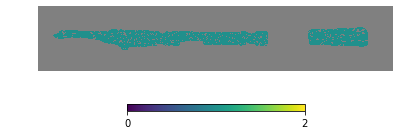

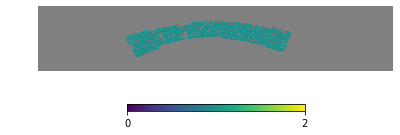

In [53]:
hp.gnomview(y_gal_ps_shear_footprint_mask, 
            rot=[182,0,0], reso=10, coord="GC", xsize=1100, ysize=200, 
            notext=True, cbar=True, title="")
hp.gnomview(y_gal_ps_shear_footprint_mask, 
            rot=[9,-36,0], reso=10, coord="GC", xsize=1100, ysize=200, 
            notext=True, cbar=True, title="")

In [7]:
np.sum(hp.ud_grade(shear_mask, 1024)*hp.ud_grade(y_mask_gal, 1024)*hp.ud_grade(y_mask_ps, 1024)) * hp.nside2pixarea(1024, degrees=True)

813.4952010933282

In [3]:
shear_mask = hp.read_map("../data/shear_maps_KiDS1000/z0.9-1.2/doublet_mask.fits")
shear_mask[shear_mask == hp.UNSEEN] = 0
shear_mask = shear_mask.astype(bool)

/home/ttroester/Codes/miniconda/envs/kcap_env_re/lib/python3.8/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/home/ttroester/Codes/miniconda/envs/kcap_env_re/lib/python3.8/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))
/home/ttroester/Codes/miniconda/envs/kcap_env_re/lib/python3.8/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/home/ttroester/Codes/miniconda/envs/kcap_env_re/lib/python3.8/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = EXPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


Create half difference map

In [12]:
hp.write_map("../data/y_maps/polspice/milca_half_difference/triplet.fits", [y_half_difference, 
                                                                            np.random.randn(y_half_difference.size), 
                                                                            np.random.randn(y_half_difference.size)], overwrite=True)

In [7]:
for z_cut in ["z0.1-0.3", "z0.3-0.5", "z0.5-0.7", "z0.7-0.9", "z0.9-1.2"]:
    os.makedirs(f"../results/measurements/shear_KiDS1000_y_randoms/{z_cut}-milca_half_difference", exist_ok=True)

In [9]:
hdu = fits.open("../data/y_maps/polspice/milca/triplet.fits")
hdu[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   12 / length of dimension 1                          
NAXIS2  =             50331648 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    3 / number of table fields                         
TTYPE1  = 'TEMPERATURE'                                                         
TFORM1  = 'E       '                                                            
TTYPE2  = 'Q_POLARISATION'                                                      
TFORM2  = 'E       '                                                            
TTYPE3  = 'U_POLARISATION'  

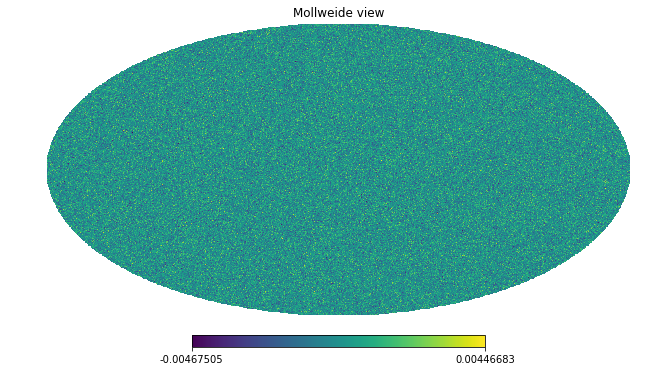

In [11]:
hp.mollview(hdu[1].data["U_POLARISATION"])

In [63]:
shear_map_0 = hp.read_map("../data/shear_maps_KiDS1000/z0.9-1.2/triplet.fits", hdu=1)

NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = EXPLICIT


In [41]:
y_var_map = hp.ud_grade(hp.ud_grade(y_half_difference**2, nside_out=128), nside_out=2048)

In [16]:
#hp.mollview(np.log10(y_stddev*1e6)*y_mask_ps)
#hp.mollview((np.sqrt(y_var_map)*1e6)*y_mask_ps*y_mask_gal*shear_mask)

hp.gnomview((np.sqrt(y_var_map)*1e6)*y_mask_ps*y_mask_gal*shear_mask, 
            rot=[182,0,0], reso=10, coord="GC", xsize=1100, ysize=200, 
            notext=True, cbar=True, title="")
hp.gnomview((np.sqrt(y_var_map)*1e6)*y_mask_ps*y_mask_gal*shear_mask, 
            rot=[9,-36,0], reso=10, coord="GC", xsize=1100, ysize=200, 
            notext=True, cbar=True, title="")



NameError: name 'y_var_map' is not defined

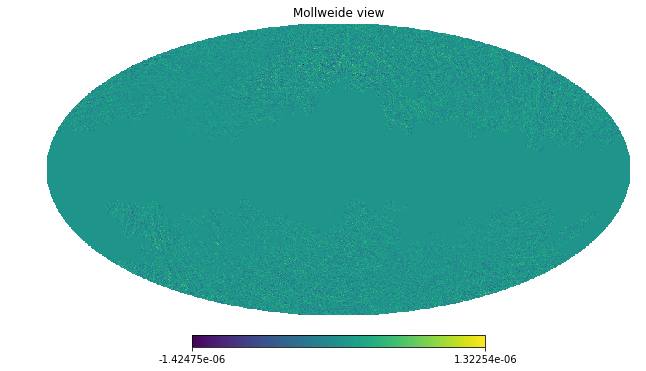

In [14]:
hp.mollview(y_full*y_mask_gal*y_mask_ps - (y_first+y_last)/2*y_mask_gal*y_mask_ps)

In [70]:
import pylenspice.pylenspice as pylenspice


In [71]:
pylenspice.write_partial_polarization_file([shear_map_0, shear_map_0, shear_map_0], 
                                            nside=2048, filename="test_triplet.fits", mask_value=hp.UNSEEN, coord="G")

# ACT

In [3]:
BN_enmap = pixell.enmap.read_map("/disk09/ttroester/ACT/compsep_maps/tilec_single_tile_BN_comptony_map_v1.2.0_joint.fits")

BN_enmap_deproject_cib = pixell.enmap.read_map("/disk09/ttroester/ACT/compsep_maps/tilec_single_tile_BN_comptony_deprojects_cib_map_v1.2.0_joint.fits")

BN_enmap_mask = pixell.enmap.read_map("/disk09/ttroester/ACT/masks/compsep_masks/act_dr4.01_s14s15_BN_compsep_mask.fits")

#D56_enmap = pixell.enmap.read_map("/disk09/ttroester/ACT/compsep_maps/tilec_single_tile_D56_comptony_map_v1.2.0_joint.fits")

In [4]:
BN_healpix = BN_enmap.to_healpix(nside=2048)
BN_healpix_deproject_cib = BN_enmap_deproject_cib.to_healpix(nside=2048)
BN_healpix_mask = BN_enmap_mask.to_healpix(nside=2048)

BN_healpix_mask_sharp = BN_healpix_mask > (1-1e-3)
#D56_healpix = D56_enmap.to_healpix(nside=2048)

BN_healpix[BN_healpix_mask == 0] = hp.UNSEEN
BN_healpix_deproject_cib[BN_healpix_mask == 0] = hp.UNSEEN

# BN_healpix_mask[BN_healpix_mask == 0] = hp.UNSEEN
# BN_healpix_mask_sharp[BN_healpix_mask_sharp == 0] = hp.UNSEEN

hp.write_map("../data/y_maps/ACT/BN.fits", BN_healpix, partial=True, overwrite=True)
hp.write_map("../data/y_maps/ACT/BN_deproject_cib.fits", BN_healpix_deproject_cib, partial=True, overwrite=True)
hp.write_map("../data/y_maps/ACT/BN_mask.fits", BN_healpix_mask, partial=False, overwrite=True)
hp.write_map("../data/y_maps/ACT/BN_mask_sharp.fits", BN_healpix_mask_sharp, partial=False, overwrite=True)

/home/ttroester/Codes/miniconda/envs/analysis/lib/python3.9/site-packages/healpy/fitsfunc.py:197: FutureWarning: The default dtype of write_map() will change in a future version: explicitly set the dtype if it is important to you
  warnings.warn(


In [9]:
pixel_coord_cel = hp.pix2ang(nside=2048, ipix=np.arange(hp.nside2npix(2048)), lonlat=True)
r = hp.Rotator(coord=["C", "G"])
pixel_coord_gal = r(*pixel_coord_cel, lonlat=True)

planck_ps_gal_mask_cel_intp = hp.get_interp_val(y_mask_ps * y_mask_gal, *pixel_coord_gal, lonlat=True)


In [24]:
BN_planck_ps_gal_healpix_mask_sharp = planck_ps_gal_mask_cel_intp * BN_healpix_mask_sharp
hp.write_map("../data/y_maps/ACT/BN_planck_ps_gal40_mask.fits", BN_planck_ps_gal_healpix_mask_sharp, partial=False, overwrite=True)

In [16]:
shear_cel_footprint = hp.read_map("../data/shear_maps_KiDS1000_cel_N/z0.1-0.3/doublet_mask.fits")
shear_cel_weight = hp.read_map("../data/shear_maps_KiDS1000_cel_N/z0.1-0.3/doublet_weight.fits")
shear_cel_e1 = hp.read_map("../data/shear_maps_KiDS1000_cel_N/z0.1-0.3/triplet.fits", hdu=2)

shear_cel_footprint[shear_cel_footprint==hp.UNSEEN] = 0

/home/ttroester/Codes/miniconda/envs/analysis/lib/python3.9/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/home/ttroester/Codes/miniconda/envs/analysis/lib/python3.9/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))
/home/ttroester/Codes/miniconda/envs/analysis/lib/python3.9/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/home/ttroester/Codes/miniconda/envs/analysis/lib/python3.9/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = EXPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


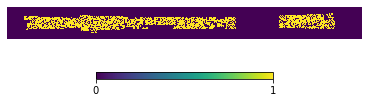

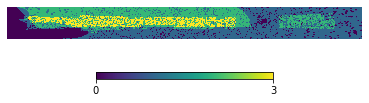

In [22]:
hp.gnomview(shear_cel_footprint, 
            rot=[182,0,0], reso=10, coord="CC", xsize=1100, ysize=100, 
            notext=True, cbar=True, title="")
hp.gnomview(BN_healpix_mask_sharp+planck_ps_gal_mask_cel_intp+shear_cel_footprint, 
            rot=[182,0,0], reso=10, coord="CC", xsize=1100, ysize=100, 
            notext=True, cbar=True, title="")
# hp.mollview(planck_ps_gal_mask_cel_intp)
# hp.mollview(D56_healpix)

# hp.mollview(shear_cel_footprint)

## ACT noise

In [4]:
BN_noise_enmap = pixell.enmap.read_map("/disk09/ttroester/ACT/compsep_maps/tilec_single_tile_BN_comptony_map_v1.2.0_joint_noise.fits")

In [68]:
def generate_noise_map(shape, wcs, noise_power_2D):
    cov = noise_power_2D[None, None, ...]
    #cov = cov * np.prod(shape[-2:])/pixell.enmap.area(shape, wcs)
    cov_sqrt = pixell.enmap.multi_pow(cov, 0.5)
    cov_sqrt[cov == 0.0] = 0
    # print(cov_sqrt.shape)
    # assert np.allclose(cov_sqrt, cov**0.5)
    data = pixell.enmap.map_mul(cov_sqrt[0,0], pixell.enmap.rand_gauss_harm(shape, wcs))
    return pixell.enmap.ifft(pixell.enmap.ndmap(data, wcs), normalize="phys").real

BN_noise_map_enmap = generate_noise_map(BN_noise_enmap.shape, BN_noise_enmap.wcs, BN_noise_enmap)

In [69]:
(BN_enmap_mask*BN_noise_map_enmap).std()

array(7.7298134)

In [70]:
BN_noise_enmap.min(), BN_noise_enmap.max()

(array(0.), array(0.00066727))

<ipython-input-72-a30d14c71bdb>:9: RuntimeWarning: divide by zero encountered in log10
  im = ax[2].imshow(np.log10(pixell.enmap.fftshift(BN_noise_enmap.downgrade(4))))


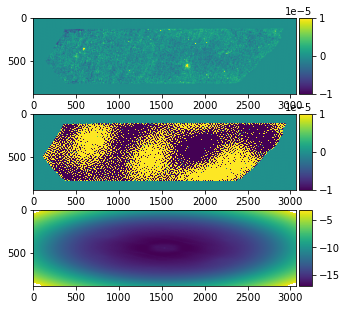

In [72]:


fig, ax = plt.subplots(3, 1, figsize=(5, 5))

im = ax[0].imshow((BN_enmap_mask*BN_enmap).downgrade(4), vmax=1e-5, vmin=-1e-5)
grftools.plotting.subplot_colorbar(im, ax[0])

im = ax[1].imshow((BN_enmap_mask*BN_noise_map_enmap).downgrade(4), vmax=1e-5, vmin=-1e-5)
grftools.plotting.subplot_colorbar(im, ax[1])

im = ax[2].imshow(np.log10(pixell.enmap.fftshift(BN_noise_enmap.downgrade(4))))
grftools.plotting.subplot_colorbar(im, ax[2])

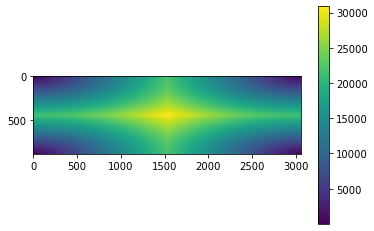

In [9]:
plt.imshow(pixell.enmap.modlmap(shape=BN_noise_enmap.shape, wcs=BN_noise_enmap.wcs).downgrade(4))
plt.colorbar()

<ipython-input-10-e429d6f9ddfe>:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.abs((BN_noise_enmap - BN_noise_enmap[::-1,::-1]))))


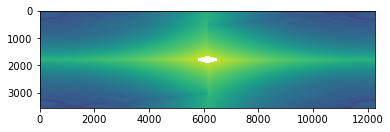

In [10]:
plt.imshow(np.log10(np.abs((BN_noise_enmap - BN_noise_enmap[::-1,::-1]))))

In [5]:
pixell.enmap.modlmap(shape=BN_enmap.shape, wcs=BN_enmap.wcs).max()

array(30889.48443538)

In [15]:
m = BN_enmap#.downgrade(4)
noise_power = BN_noise_enmap#.downgrade(4)
# noise_power_shifted = pixell.enmap.fftshift(BN_noise_enmap).downgrade(4)

# bin_edges = np.linspace(100, 24100, 61)
bin_edges = np.geomspace(100, 15000, 101)

modlmap = pixell.enmap.modlmap(shape=m.shape, wcs=m.wcs)
ft = pixell.enmap.fft(m, normalize="phys")

Cl_BN = np.zeros(len(bin_edges)-1)
ell = np.zeros_like(Cl_BN)

Cl_noise = np.zeros_like(Cl_BN)
Cl_noise_ell_weighted = np.zeros_like(Cl_BN)

modl_flat = modlmap.flatten()
sort_idx = np.argsort(modl_flat)
power_flat = np.abs(ft**2).flatten()[sort_idx]
noise_power_flat = noise_power.flatten()[sort_idx]
modl_flat = modl_flat[sort_idx]

for i in tqdm.tqdm(range(len(Cl_BN))):
    # print(f"Bin {i}")
    bin_idx_l = np.searchsorted(modl_flat, bin_edges[i])
    bin_idx_u = np.searchsorted(modl_flat, bin_edges[i+1])

    Cl_BN[i] = power_flat[bin_idx_l:bin_idx_u].mean()
    Cl_noise[i] = noise_power_flat[bin_idx_l:bin_idx_u].mean()
    ell[i] = modl_flat[bin_idx_l:bin_idx_u].mean()


ell_beam, BN_beam = np.loadtxt("/disk09/ttroester/ACT/window_functions/compsep_beams/tilec_single_tile_BN_comptony_map_v1.2.0_joint_beam.txt", unpack=True)
BN_beam_binned = np.zeros_like(Cl_BN)
for i in range(len(Cl_BN)):
    bin_mask = (ell_beam > bin_edges[i]) & (ell_beam <= bin_edges[i+1])
    BN_beam_binned[i] = np.average(BN_beam[bin_mask], weights=ell_beam[bin_mask])


100%|██████████| 100/100 [00:00<00:00, 1180.79it/s]


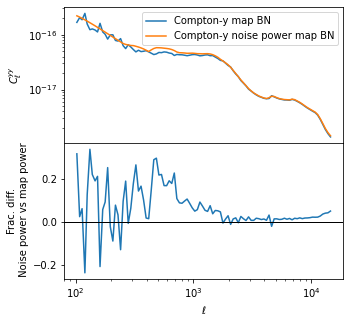

In [22]:
u = 1#ell**2/(2*np.pi)

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(5, 5))
fig.subplots_adjust(hspace=0)

ax[0].semilogy(ell, u*Cl_BN/np.mean(BN_enmap_mask), label="Compton-y map BN")
ax[0].semilogy(ell, u*Cl_noise*BN_beam_binned**2, label="Compton-y noise power map BN")

ax[0].set_ylabel(r"$C^{yy}_\ell$")
ax[0].legend()

ax[1].plot(ell, Cl_noise*BN_beam_binned**2/(Cl_BN/np.mean(BN_enmap_mask))-1)
# ax[1].plot(ell, Cl_noise_ell_weighted*BN_beam_binned**2/(Cl_BN/np.mean(BN_enmap_mask))-1)

ax[1].set_xscale("log")

ax[1].axhline(0, c="k", lw=1)
ax[1].set_xlabel(r"$\ell$")

ax[1].set_ylabel("Frac. diff.\n Noise power vs map power")

fig.savefig("plots/act_bn_noise_vs_map_power.png", dpi=300)

In [43]:
BN_mask = hp.read_map("../data/y_maps/polspice/ACT_BN/singlet_mask.fits")
BN = hp.read_map("../data/y_maps/polspice/ACT_BN/triplet.fits", hdu=1)

/home/ttroester/Codes/miniconda/envs/kcap_env_re/lib/python3.8/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/home/ttroester/Codes/miniconda/envs/kcap_env_re/lib/python3.8/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))
/home/ttroester/Codes/miniconda/envs/kcap_env_re/lib/python3.8/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/home/ttroester/Codes/miniconda/envs/kcap_env_re/lib/python3.8/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


/home/ttroester/Codes/miniconda/envs/kcap_env_re/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/ttroester/Codes/miniconda/envs/kcap_env_re/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/home/ttroester/Codes/miniconda/envs/kcap_env_re/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a gl

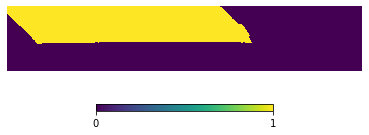

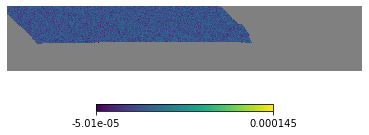

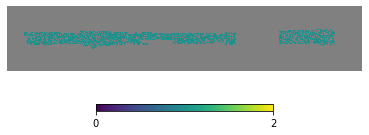

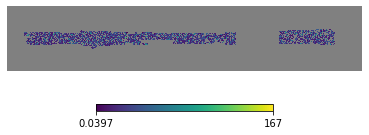

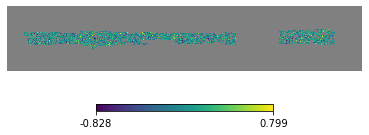

In [44]:
#hp.mollview(BN_healpix)
# mask = BN_healpix_mask_sharp[:]
# mask[shear_cel_footprint > 0] += 1
hp.gnomview(BN_mask, 
            rot=[182,0,0], reso=10, coord="CC", xsize=1100, ysize=200, 
            notext=True, cbar=True, title="")
hp.gnomview(BN, 
            rot=[182,0,0], reso=10, coord="CC", xsize=1100, ysize=200, 
            notext=True, cbar=True, title="")
hp.gnomview(shear_cel_footprint, 
            rot=[182,0,0], reso=10, coord="CC", xsize=1100, ysize=200, 
            notext=True, cbar=True, title="")
hp.gnomview(shear_cel_weight, 
            rot=[182,0,0], reso=10, coord="CC", xsize=1100, ysize=200, 
            notext=True, cbar=True, title="")
hp.gnomview(shear_cel_e1, 
            rot=[182,0,0], reso=10, coord="CC", xsize=1100, ysize=200, 
            notext=True, cbar=True, title="")


In [13]:
BN_healpix[BN_healpix != hp.UNSEEN]

array([-2.54111796e-07, -2.53825188e-07, -2.60204156e-07, ...,
       -2.58397676e-07, -2.53888508e-07, -2.55705031e-07])

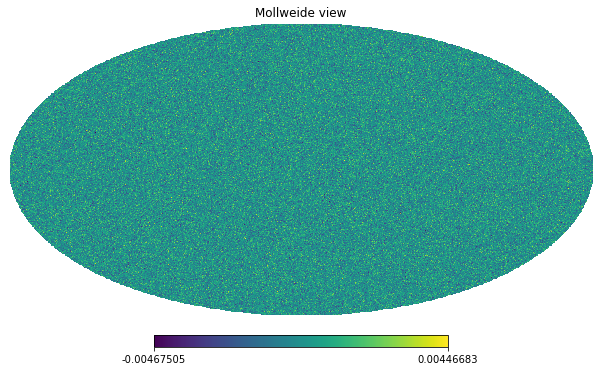

In [48]:
hp.mollview(hp.read_map("../data/y_maps/polspice/milca/triplet.fits", hdu=1, field=1))

In [7]:
ziang_map = hp.read_map("../data/y_maps/Planck_processed/ziang/ymap_rawcov_needlet_galmasked_v1.02_bp.fits")

ziang_mask = hp.read_map("../data/y_maps/Planck_processed/ziang/ycibmask_G.fits")
milca_mask = hp.read_map("../data/y_maps/polspice/milca/singlet_mask.fits")
milca_mask[milca_mask==hp.UNSEEN] = 0

shear_mask = hp.read_map("../data/shear_maps_KiDS1000/z0.9-1.2/doublet_weight.fits")
shear_mask[shear_mask==hp.UNSEEN] = 0
shear_mask[shear_mask>0] = 1

/home/ttroester/Codes/miniconda/envs/analysis/lib/python3.9/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/home/ttroester/Codes/miniconda/envs/analysis/lib/python3.9/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))
/home/ttroester/Codes/miniconda/envs/analysis/lib/python3.9/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/home/ttroester/Codes/miniconda/envs/analysis/lib/python3.9/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))
/home/ttroester/Codes/miniconda/envs/analysis/lib/p

<ipython-input-9-eded80d5f435>:1: RuntimeWarning: invalid value encountered in log
  hp.mollview(np.log(ziang_map))
/home/ttroester/Codes/miniconda/envs/analysis/lib/python3.9/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_over(newcm(1.0))
/home/ttroester/Codes/miniconda/envs/analysis/lib/python3.9/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_under(bgcolor)
/home/ttro

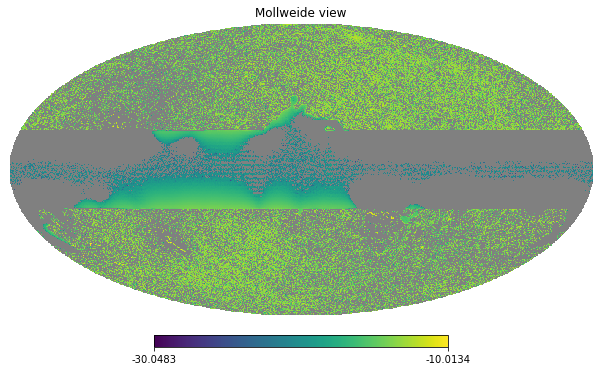

In [9]:
hp.mollview(np.log(ziang_map))

# hp.mollview((ziang_mask-milca_mask))
# hp.mollview(shear_mask)